## Imports

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

from time import sleep
from datetime import datetime


### NFL

In [2]:
# Overall Team Data
team_df1 = pd.read_csv('../data/teams_2019_2015.csv')
team_df2 = pd.read_csv('../data/teams_2014_1970.csv')

In [3]:
# Passing Data
pass_df1 = pd.read_csv('../data/pass_2019_2015.csv')
pass_df2 = pd.read_csv('../data/pass_2014_1970.csv')

In [4]:
# Rushing Data
rush_df = pd.read_csv('../data/rush_stats.csv')

In [5]:
# Defense Data
def_df = pd.read_csv('../data/defensive_stats.csv')

### College

In [6]:
college_stand_df = pd.read_csv('../data/college_standings_2019_1996.csv')

In [7]:
college_off_df = pd.read_csv('../data/college_offense_stats_2019_1996.csv')

In [8]:
college_def_df = pd.read_csv('../data/college_defense_stats_2019_1996.csv')

## Combining Data

### Stacked Concatenation

In [9]:
# Multiyear DataFrames - Stacking them dfs upon each other
team_df = pd.concat([team_df1, team_df2], ignore_index=True)
pass_df = pd.concat([pass_df1, pass_df2], ignore_index=True)

### Merging DataFrames

### NFL Stats

In [10]:
# Merging team & passsing DataFrames
df1 = pd.merge(team_df, pass_df, left_on=['team','year'], right_on=['team','year'])
df1.shape

(1477, 34)

* I am merging all of the passing stats with the team stats DataFrame by the team name & year so that the stats match up.

In [11]:
df2 = pd.merge(df1, rush_df, left_on=['team','year'], right_on=['team','year'])
df2.shape

(1477, 43)

* Performing the same merge with the previously merged DataFrame, but with the rushing stats.

In [12]:
df = pd.merge(df2, def_df, left_on=['team','year'], right_on=['team','year'])
df.shape

(1477, 69)

* Performing the same merge with the previously merged DataFrame, but with the defensive stats. I now have one master DataFrame, that includes all of the statistics together, per team and year, that I can perform my analysis on.

In [13]:
df.drop(columns='game_y', inplace=True)

In [14]:
df.rename(columns={'game_x':'game'}, inplace=True)

* Removing duplicate game columns, because we only need one column that shows this statistic.

In [15]:
df.shape

(1477, 68)

In [16]:
df.head(2)

,team,year,wins,losses,ties,win_loss_perc,points_scored,opp_points,points_diff,margin_of_victory,...,opp_rush_yds,opp_rush_td,opp_rush_y/a,opp_rush_1stD,def_pen,def_pen_yds,def_pen_1stD,opp_score_pct,turnover_pct,def_exp
0,New England Patriots,2019,8,1,0.0,0.889,270,98,172,19.1,...,892,5,4.7,38,59,510,21,11.4,21.9,162.44
1,Buffalo Bills,2019,6,3,0.0,0.667,174,150,24,2.7,...,1040,9,4.5,54,56,463,14,23.8,9.9,14.81


In [17]:
current_NFL = df[(df['year'] > 2013) & (df['year'] < 2019)]

* Selecting 5 NFL years between 2014 - 2018 to be used in my recommender data. I want to use more recent years because teams looks different over the course of years because of player and coaching turnover, along with other factors. 
* I am not including 2019, because as of now (November 2019) the season is still under way and I want to use full season data.

In [20]:
current_NFL.describe().T.head(25)

,count,mean,std,min,25%,50%,75%,max
year,160.0,2016.000000,1.418654,2014.0,2015.000,2016.00,2017.000,2018.000
wins,160.0,7.968750,3.066192,0.0,6.000,8.00,10.000,15.000
losses,160.0,7.968750,3.072339,1.0,6.000,8.00,10.000,16.000
ties,96.0,0.104167,0.307080,0.0,0.000,0.00,0.000,1.000
win_loss_perc,160.0,0.500256,0.191683,0.0,0.375,0.50,0.625,0.938
points_scored,160.0,362.362500,67.718943,224.0,318.750,359.00,409.250,565.000
opp_points,160.0,362.362500,52.282432,250.0,319.750,360.50,400.000,480.000
points_diff,160.0,0.000000,94.746667,-200.0,-68.750,1.50,72.250,192.000
margin_of_victory,160.0,-0.002500,5.926191,-12.5,-4.325,0.10,4.525,12.000
SoS,160.0,0.003125,1.591701,-3.9,-1.200,-0.05,1.300,3.800


### College Football Stats

In [21]:
cdf1 = pd.merge(college_stand_df, college_off_df, left_on=['School','year'], right_on=['School','year'])
cdf1.shape

(2428, 42)

* Merging the College offensive DataFrame upon the overall College Standings DataFrame by the school and year.

In [22]:
cdf = pd.merge(cdf1, college_def_df, left_on=['School','year'], right_on=['School','year'])
cdf.shape

(2428, 66)

* Merging the College Defensive stats upon the previously merged DataFrame for one master.

In [23]:
cdf.head(2)

,Rk,School,Conf,W,L,Pct,W.1,L.1,Pct.1,Off,...,opp_Avg_Yds,opp_1st_down_Pass,opp_1st_down_Rush,opp_1st_down_Pen,opp_1st_down_Tot,opp_pen_No.,opp_pen_Yds,opp_Fum,opp_Int,opp_TO_Tot
0,1,Clemson,ACC (Atlantic),11,0,1.0,8.0,0.0,1.0,45.9,...,3.9,5.0,5.6,1.2,11.8,5.5,51.7,1.0,1.2,2.2
1,2,Wake Forest,ACC (Atlantic),7,3,0.7,3.0,3.0,0.5,32.4,...,5.8,11.4,8.1,1.2,20.7,6.2,52.9,0.8,1.0,1.8


In [24]:
current_College = cdf[(cdf['year'] > 2013) & (cdf['year'] < 2019)]

In [25]:
current_College.columns

Index(['Rk', 'School', 'Conf', 'W', 'L', 'Pct', 'W.1', 'L.1', 'Pct.1', 'Off',
       'Def', 'SRS', 'SOS', 'AP Pre', 'AP High', 'AP Rank', 'Notes', 'year',
       'off_Rk', 'G_x', 'Pts', 'pass_cmp', 'pass_Att', 'cmp_Pct', 'pass_Yds',
       'pass_TD', 'rush_Att', 'rush_Yds', 'rush_Avg', 'rush_TD', 'Plays',
       'Yds', 'Avg_Yds', '1st_down_Pass', '1st_down_Rush', '1st_down_Pen',
       '1st_down_Tot', 'pen_No.', 'pen_Yds', 'Fum', 'Int', 'TO_Tot', 'def_Rk',
       'G_y', 'opp_Pts', 'opp_cmp', 'opp_pass_Att', 'opp_cmp_Pct',
       'opp_ass_Yds', 'opp_pass_TD', 'opp_rush_Att', 'opp_rush_Yds',
       'opp_rush_Avg', 'opp_rush_TD', 'opp_Plays', 'opp_Yds', 'opp_Avg_Yds',
       'opp_1st_down_Pass', 'opp_1st_down_Rush', 'opp_1st_down_Pen',
       'opp_1st_down_Tot', 'opp_pen_No.', 'opp_pen_Yds', 'opp_Fum', 'opp_Int',
       'opp_TO_Tot'],
      dtype='object')

In [26]:
current_NFL.columns

Index(['team', 'year', 'wins', 'losses', 'ties', 'win_loss_perc',
       'points_scored', 'opp_points', 'points_diff', 'margin_of_victory',
       'SoS', 'SRS', 'OSRS', 'DSRS', 'game', 'comp', 'attempts', 'comp_perc',
       'pass_yards', 'pass_tds', 'pass_td_perc', 'int', 'int_perc',
       'pass_long', 'pass_y/a', 'y/c', 'pass_y/g', 'QB_rate', 'sacks',
       'sack_yds', 'sack_perc', 'qb_comebacks', 'qb_gwd', 'pass_exp',
       'rush_att', 'rush_yards', 'rush_tds', 'rush_long', 'rush_y/a',
       'rush_y/g', 'fumbles', 'rush_exp', 'game', 'points_allow', 'opp_yards',
       'opp_plays', 'opp_y/p', 'turnover', 'opp_fumb', 'opp_1stD', 'opp_comp',
       'opp_pass_att', 'opp_pass_yds', 'opp_pass_td', 'def_int', 'opp_Ny/a',
       'opp_pass_1stD', 'opp_rush_att', 'opp_rush_yds', 'opp_rush_td',
       'opp_rush_y/a', 'opp_rush_1stD', 'def_pen', 'def_pen_yds',
       'def_pen_1stD', 'opp_score_pct', 'turnover_pct', 'def_exp'],
      dtype='object')

In [27]:
col_drop = ['ties','opp_points','points_diff', 'margin_of_victory', 'OSRS', 'DSRS', 'pass_td_perc',
           'int_perc', 'pass_long','pass_yards','pass_y/a', 'y/c', 'QB_rate', 'sacks',
            'sack_yds', 'sack_perc', 'qb_comebacks', 'qb_gwd', 'pass_exp', 
           'rush_long', 'rush_yards','rush_y/a', 'rush_exp','opp_Ny/a', 'opp_pass_1stD',
            'opp_rush_y/a' ,'opp_1stD', 'opp_pass_1stD', 'opp_rush_1stD', 'def_pen', 
            'def_pen_yds', 'def_pen_1stD', 'opp_score_pct', 'turnover_pct', 'def_exp']
current_NFL = current_NFL.drop(columns=col_drop).copy()

Dropping columns from the NFL DataFrame that are excessive and unneccesary. These columns are not included in the college stats so they will not be useful in the recommender since a comparison can not be made.

In [28]:
current_NFL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 32 to 191
Data columns (total 34 columns):
team             160 non-null object
year             160 non-null int64
wins             160 non-null int64
losses           160 non-null int64
win_loss_perc    160 non-null float64
points_scored    160 non-null int64
SoS              160 non-null float64
SRS              160 non-null float64
game             160 non-null int64
comp             160 non-null int64
attempts         160 non-null int64
comp_perc        160 non-null float64
pass_tds         160 non-null int64
int              160 non-null int64
pass_y/g         160 non-null float64
rush_att         160 non-null int64
rush_tds         160 non-null int64
rush_y/g         160 non-null float64
fumbles          160 non-null int64
game             160 non-null int64
points_allow     160 non-null int64
opp_yards        160 non-null int64
opp_plays        160 non-null int64
opp_y/p          160 non-null float64
turnover       

In [29]:
col_drop2 = ['Rk','W.1', 'L.1', 'Pct.1','AP Pre', 'AP High', 'AP Rank', 'Notes', 'off_Rk','Pts',
            '1st_down_Pass', '1st_down_Rush', '1st_down_Pen', '1st_down_Tot', 'pen_No.', 'pen_Yds', 'def_Rk', 'G_y',
            'opp_Pts', 'opp_1st_down_Pass', 'opp_1st_down_Rush', 'opp_1st_down_Pen',
       'opp_1st_down_Tot', 'opp_pen_No.', 'opp_pen_Yds']
current_College = current_College.drop(columns=col_drop2).copy()

Dropping the columns that I don't need moving forward. This is mainly determined by what columns are not included in the NFL DataFrame. They will not be useful in the recommender since a comparison can not be made.

In [30]:
current_College.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 129 to 767
Data columns (total 41 columns):
School          639 non-null object
Conf            639 non-null object
W               639 non-null int64
L               639 non-null int64
Pct             639 non-null float64
Off             639 non-null float64
Def             639 non-null float64
SRS             639 non-null float64
SOS             639 non-null float64
year            639 non-null int64
G_x             639 non-null int64
pass_cmp        639 non-null float64
pass_Att        639 non-null float64
cmp_Pct         639 non-null float64
pass_Yds        639 non-null float64
pass_TD         639 non-null float64
rush_Att        639 non-null float64
rush_Yds        639 non-null float64
rush_Avg        639 non-null float64
rush_TD         639 non-null float64
Plays           639 non-null float64
Yds             639 non-null float64
Avg_Yds         639 non-null float64
Fum             639 non-null float64
Int            

* To make sure both the NFL & college DataFrames have common columns I have dropped columns that does not exist in both College and the NFL.

## Column Alignment

### NFL
---

* The columns between both the NFL & College DataFrames have different orders. So I am going to realign them to be better suited to be joined later on.
* Also, the data or stats in each observation are not the same as well. (i.e. college provides there stats on an average per game basis and the nfl provides stats in total across the season. 
* Since we will be comparision the NFL to the College stats, I would like for my stats to be on a per game basis to make sure we are comparing apples to apples as much as possible. (NFL plays more games than College so their total stats would be more than college's).

In [31]:
current_NFL['comp']

32     378
33     292
34     271
35     299
36     334
      ... 
187    301
188    287
189    320
190    292
191    327
Name: comp, Length: 160, dtype: int64

In [32]:
nfl_per_cols = ['points_scored','comp', 'attempts','pass_tds','int','rush_att','rush_tds','fumbles',
                'points_allow','opp_yards','opp_plays','turnover','opp_fumb','opp_comp','opp_pass_att',
                'opp_pass_yds','opp_pass_td','def_int','opp_rush_att','opp_rush_yds','opp_rush_td']

This list of columns will be the list that I want to apply the per game average to in the NFL DataFrame.

In [33]:
current_NFL = current_NFL.apply(lambda x: x/16 if x.name in nfl_per_cols else x)

Recalculating each column to a per game basis by dividing by the number of games the NFL plays. I am doing this to properly match the stats with the college DataFrame. All of the stats in that DataFrame is on a per game basis. This helps because since both platforms plays a different amount of games, they will be compared on a similar level.

In [34]:
# 'rush_att','rush_tds','fumbles','points_allow','opp_yards','opp_plays','turnover','opp_fumb','opp_comp','opp_pass_att','opp_pass_yds','opp_pass_td','def_int','opp_rush_att','opp_rush_yds','opp_rush_td'

In [35]:
current_NFL.columns

Index(['team', 'year', 'wins', 'losses', 'win_loss_perc', 'points_scored',
       'SoS', 'SRS', 'game', 'comp', 'attempts', 'comp_perc', 'pass_tds',
       'int', 'pass_y/g', 'rush_att', 'rush_tds', 'rush_y/g', 'fumbles',
       'game', 'points_allow', 'opp_yards', 'opp_plays', 'opp_y/p', 'turnover',
       'opp_fumb', 'opp_comp', 'opp_pass_att', 'opp_pass_yds', 'opp_pass_td',
       'def_int', 'opp_rush_att', 'opp_rush_yds', 'opp_rush_td'],
      dtype='object')

In [36]:
current_NFL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 32 to 191
Data columns (total 34 columns):
team             160 non-null object
year             160 non-null int64
wins             160 non-null int64
losses           160 non-null int64
win_loss_perc    160 non-null float64
points_scored    160 non-null float64
SoS              160 non-null float64
SRS              160 non-null float64
game             160 non-null int64
comp             160 non-null float64
attempts         160 non-null float64
comp_perc        160 non-null float64
pass_tds         160 non-null float64
int              160 non-null float64
pass_y/g         160 non-null float64
rush_att         160 non-null float64
rush_tds         160 non-null float64
rush_y/g         160 non-null float64
fumbles          160 non-null float64
game             160 non-null int64
points_allow     160 non-null float64
opp_yards        160 non-null float64
opp_plays        160 non-null float64
opp_y/p          160 non-null f

* viewing details of columns after processing.
* Now there will be further processing of columns to line up to the college DataFrame

In [42]:
# drop extra game column
current_NFL = current_NFL.loc[:, ~current_NFL.columns.duplicated()]
# combine turnovers - offensive
current_NFL['TO_Tot'] = current_NFL['fumbles'] + current_NFL['int']
# create a opponent completion percent category
current_NFL['opp_comp_Pct'] = round(current_NFL['opp_comp'] / current_NFL['opp_pass_att'], 2)

* Dropped the duplicate game column.
* Engineered a total turnover column for offense.
* Engineered an opponent completion percentage column.

In [51]:
# current_NFL['opp_comp_Pct'].head(45)

32    0.61
33    0.66
34    0.64
35    0.63
36    0.58
37    0.64
38    0.63
39    0.67
40    0.65
41    0.71
42    0.63
43    0.63
44    0.64
45    0.64
46    0.64
47    0.62
48    0.68
49    0.67
50    0.67
51    0.65
52    0.61
53    0.63
54    0.64
55    0.65
56    0.67
57    0.68
58    0.67
59    0.72
60    0.65
61    0.65
62    0.63
63    0.68
64    0.62
65    0.65
66    0.64
67    0.59
68    0.60
69    0.59
70    0.60
71    0.69
72    0.57
73    0.61
74    0.62
75    0.64
76    0.57
Name: opp_comp_Pct, dtype: float64

In [44]:
current_NFL['comp_perc'].head(2)

32    65.9
33    64.2
Name: comp_perc, dtype: float64

It is observed that my 2 columns that represents the completion percentage for both the offenese and defense side of the ball have different numerical formats or scales.

* The offense percentage is communicated out of 100 percent points
* The defense percentage is communicated in decimal format on a scale from 0 to 1.
* I prefer my percentage to be communicated on a scale from 0 to 1 so that the large percentage number can not hold too much weight in my recommender calculations going forward (even after scaling potentially).

So I will transform my perctange stats on this scale and also verify that the college stats are in the same format as well.

In [46]:
# current_NFL['comp_perc']

32     65.9
33     64.2
34     54.3
35     57.1
36     60.1
       ... 
187    56.7
188    63.2
189    56.3
190    60.0
191    63.5
Name: comp_perc, Length: 160, dtype: float64

In [52]:
# Transforming offensive completion percantage column to less than 1
current_NFL['comp_perc'] = [round(x / 100,2) for x in current_NFL['comp_perc']]

dividing by 100 to change the scale of the percentage column.

In [53]:
col_order = ['team', 'year','game','wins', 'losses', 'win_loss_perc', 'points_scored',
             'points_allow','SRS', 'SoS','comp', 'attempts', 'comp_perc',
             'pass_y/g','pass_tds','rush_att','rush_y/g','rush_tds','fumbles','int','TO_Tot',
             'opp_comp','opp_pass_att','opp_comp_Pct','opp_pass_yds','opp_pass_td', 
             'opp_rush_att', 'opp_rush_yds','opp_rush_td','opp_plays','opp_yards',
             'opp_y/p','opp_fumb','def_int','turnover']

In [54]:
current_NFL = current_NFL[col_order]

In [55]:
current_NFL.head()

,team,year,game,wins,losses,win_loss_perc,points_scored,points_allow,SRS,SoS,...,opp_pass_td,opp_rush_att,opp_rush_yds,opp_rush_td,opp_plays,opp_yards,opp_y/p,opp_fumb,def_int,turnover
32,New England Patriots,2018,16,11,5,0.688,27.2500,20.3125,5.2,-1.8,...,1.8125,22.9375,112.6875,0.4375,62.6250,359.1250,5.7,0.6250,1.1250,1.7500
33,Miami Dolphins,2018,16,7,9,0.438,19.9375,27.0625,-8.8,-1.7,...,1.9375,30.3125,145.3125,1.0625,64.0000,391.0625,6.1,0.4375,1.3125,1.7500
34,Buffalo Bills,2018,16,6,10,0.375,16.8125,23.3750,-6.9,-0.3,...,1.3750,27.5000,114.9375,1.0625,60.5000,294.1250,4.9,0.6875,1.0000,1.6875
35,New York Jets,2018,16,4,12,0.250,20.8125,27.5625,-7.8,-1.1,...,1.8125,27.5000,126.3125,1.0000,66.3125,380.3750,5.7,0.4375,0.8125,1.2500
36,Baltimore Ravens,2018,16,10,6,0.625,24.3125,17.9375,7.0,0.6,...,1.3125,22.1250,82.9375,0.6875,60.8750,292.9375,4.8,0.3125,0.7500,1.0625


In [56]:
current_NFL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 32 to 191
Data columns (total 35 columns):
team             160 non-null object
year             160 non-null int64
game             160 non-null int64
wins             160 non-null int64
losses           160 non-null int64
win_loss_perc    160 non-null float64
points_scored    160 non-null float64
points_allow     160 non-null float64
SRS              160 non-null float64
SoS              160 non-null float64
comp             160 non-null float64
attempts         160 non-null float64
comp_perc        160 non-null float64
pass_y/g         160 non-null float64
pass_tds         160 non-null float64
rush_att         160 non-null float64
rush_y/g         160 non-null float64
rush_tds         160 non-null float64
fumbles          160 non-null float64
int              160 non-null float64
TO_Tot           160 non-null float64
opp_comp         160 non-null float64
opp_pass_att     160 non-null float64
opp_comp_Pct     160 non-null

I now have all of the columns of interest in the proper format and order. I can proceed forward with the college data processing.
* Also adding a final column to specify each team being from the NFL.

In [58]:
current_NFL['League'] = 'NFL'

/Users/DMay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### College
---

In [59]:
col_drop_extra = ['Conf','rush_Avg','Plays','Yds','Avg_Yds','opp_rush_Avg']
current_College = current_College.drop(columns=col_drop_extra).copy()

Needing to drop unneccesary columns

In [60]:
current_College.columns

Index(['School', 'W', 'L', 'Pct', 'Off', 'Def', 'SRS', 'SOS', 'year', 'G_x',
       'pass_cmp', 'pass_Att', 'cmp_Pct', 'pass_Yds', 'pass_TD', 'rush_Att',
       'rush_Yds', 'rush_TD', 'Fum', 'Int', 'TO_Tot', 'opp_cmp',
       'opp_pass_Att', 'opp_cmp_Pct', 'opp_ass_Yds', 'opp_pass_TD',
       'opp_rush_Att', 'opp_rush_Yds', 'opp_rush_TD', 'opp_Plays', 'opp_Yds',
       'opp_Avg_Yds', 'opp_Fum', 'opp_Int', 'opp_TO_Tot'],
      dtype='object')

In [61]:
col_order_coll = ['School', 'year','G_x','W', 'L', 'Pct', 'Off', 'Def', 'SRS', 'SOS',
       'pass_cmp', 'pass_Att', 'cmp_Pct', 'pass_Yds', 'pass_TD', 'rush_Att',
       'rush_Yds', 'rush_TD', 'Fum', 'Int', 'TO_Tot', 'opp_cmp',
       'opp_pass_Att', 'opp_cmp_Pct', 'opp_ass_Yds', 'opp_pass_TD',
       'opp_rush_Att', 'opp_rush_Yds', 'opp_rush_TD', 'opp_Plays', 'opp_Yds',
       'opp_Avg_Yds', 'opp_Fum', 'opp_Int', 'opp_TO_Tot']

In [62]:
current_College = current_College[col_order_coll]

Reordering columns to match with the NFL's order.

In [68]:
# Transforming offensive and defensive completion percantage columns to less than 1
current_College['cmp_Pct'] = [round(x / 100,2) for x in current_College['cmp_Pct']]

current_College['opp_cmp_Pct'] = [round(x / 100,2) for x in current_College['opp_cmp_Pct']]

In [69]:
current_College.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 129 to 767
Data columns (total 35 columns):
School          639 non-null object
year            639 non-null int64
G_x             639 non-null int64
W               639 non-null int64
L               639 non-null int64
Pct             639 non-null float64
Off             639 non-null float64
Def             639 non-null float64
SRS             639 non-null float64
SOS             639 non-null float64
pass_cmp        639 non-null float64
pass_Att        639 non-null float64
cmp_Pct         639 non-null float64
pass_Yds        639 non-null float64
pass_TD         639 non-null float64
rush_Att        639 non-null float64
rush_Yds        639 non-null float64
rush_TD         639 non-null float64
Fum             639 non-null float64
Int             639 non-null float64
TO_Tot          639 non-null float64
opp_cmp         639 non-null float64
opp_pass_Att    639 non-null float64
opp_cmp_Pct     639 non-null float64
opp_ass_Yds   

Adding a final column to specify teams being from College

In [70]:
current_College['League'] = 'College'

### Combining DataFrames of interest
---

In order to proceed forward with creating a recommender I will rename the columns for consistency and add the two NFL & College DataFrames together.

In [71]:
final_names = ['team', 'year','games_played','wins', 'loss', 'win_pct', 'off_pts', 'def_pts', 'SRS', 'SOS',
       'pass_comp', 'pass_att', 'comp_pct', 'pass_yds', 'pass_TD', 'rush_att',
       'rush_yds', 'rush_TD', 'Fum', 'Int', 'TO_Tot', 'opp_pass_comp',
       'opp_pass_att', 'opp_comp_pct', 'opp_pass_yds', 'opp_pass_TD',
       'opp_rush_att', 'opp_rush_yds', 'opp_rush_TD', 'opp_plays', 'opp_yds',
       'opp_yds_play', 'opp_Fum', 'opp_Int', 'opp_TO_Tot','league']

Final list of column names I want to rename each DataFrame's columns. I made it a list on its own, just in case I want to further modify this column list in the future.

In [72]:
# renaming NFL columns
current_NFL.columns = final_names
# renaming College columns
current_College.columns = final_names

In [73]:
current_NFL.columns

Index(['team', 'year', 'games_played', 'wins', 'loss', 'win_pct', 'off_pts',
       'def_pts', 'SRS', 'SOS', 'pass_comp', 'pass_att', 'comp_pct',
       'pass_yds', 'pass_TD', 'rush_att', 'rush_yds', 'rush_TD', 'Fum', 'Int',
       'TO_Tot', 'opp_pass_comp', 'opp_pass_att', 'opp_comp_pct',
       'opp_pass_yds', 'opp_pass_TD', 'opp_rush_att', 'opp_rush_yds',
       'opp_rush_TD', 'opp_plays', 'opp_yds', 'opp_yds_play', 'opp_Fum',
       'opp_Int', 'opp_TO_Tot', 'league'],
      dtype='object')

In [74]:
current_College.columns

Index(['team', 'year', 'games_played', 'wins', 'loss', 'win_pct', 'off_pts',
       'def_pts', 'SRS', 'SOS', 'pass_comp', 'pass_att', 'comp_pct',
       'pass_yds', 'pass_TD', 'rush_att', 'rush_yds', 'rush_TD', 'Fum', 'Int',
       'TO_Tot', 'opp_pass_comp', 'opp_pass_att', 'opp_comp_pct',
       'opp_pass_yds', 'opp_pass_TD', 'opp_rush_att', 'opp_rush_yds',
       'opp_rush_TD', 'opp_plays', 'opp_yds', 'opp_yds_play', 'opp_Fum',
       'opp_Int', 'opp_TO_Tot', 'league'],
      dtype='object')

The output above shows that the columns between the two DataFrames have the same number of columns along with the same names. Our DataFrames are now ready to be combined.

In [50]:
# current_NFL.off_pts.astype('Float64')

In [75]:
# Final DataFrame for recommender system.
rec_df = pd.concat([current_NFL, current_College],ignore_index=True)
rec_df.head(2)

,team,year,games_played,wins,loss,win_pct,off_pts,def_pts,SRS,SOS,...,opp_rush_att,opp_rush_yds,opp_rush_TD,opp_plays,opp_yds,opp_yds_play,opp_Fum,opp_Int,opp_TO_Tot,league
0,New England Patriots,2018,16,11,5,0.688,27.2500,20.3125,5.2,-1.8,...,22.9375,112.6875,0.4375,62.625,359.1250,5.7,0.6250,1.1250,1.75,NFL
1,Miami Dolphins,2018,16,7,9,0.438,19.9375,27.0625,-8.8,-1.7,...,30.3125,145.3125,1.0625,64.000,391.0625,6.1,0.4375,1.3125,1.75,NFL


In [76]:
rec_df.tail(2)

,team,year,games_played,wins,loss,win_pct,off_pts,def_pts,SRS,SOS,...,opp_rush_att,opp_rush_yds,opp_rush_TD,opp_plays,opp_yds,opp_yds_play,opp_Fum,opp_Int,opp_TO_Tot,league
797,Idaho,2014,11,1,10,0.091,25.0,37.3,-19.67,-7.21,...,43.9,245.9,2.9,66.8,462.1,6.9,0.8,0.7,1.5,College
798,Georgia State,2014,12,1,11,0.083,22.7,43.3,-20.41,-4.50,...,48.5,303.4,3.4,75.7,497.1,6.6,0.4,0.3,0.7,College


In [77]:
rec_df.shape

(799, 36)

Our master DataFrame for the recommender has 799 rows/teams and 36 statistical categories/columns.

In [78]:
rec_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,799.0,2016.007509,1.415965,2014.0000,2015.00000,2016.0000,2017.00000,2018.0000
games_played,799.0,13.386733,1.468764,10.0000,12.00000,13.0000,14.00000,16.0000
wins,799.0,6.987484,3.084417,0.0000,5.00000,7.0000,9.00000,15.0000
loss,799.0,6.392991,2.733942,0.0000,4.00000,6.0000,8.00000,16.0000
win_pct,799.0,0.515990,0.210925,0.0000,0.33300,0.5380,0.69200,1.0000
off_pts,799.0,27.946339,7.154802,11.1000,22.84375,27.2000,32.65000,48.4000
def_pts,799.0,26.687015,6.587825,11.9000,22.00000,25.8000,31.05000,50.4000
SRS,799.0,0.731489,9.270722,-23.7500,-5.88000,1.1000,7.15500,26.4500
SOS,799.0,-0.013755,4.152270,-10.6200,-3.17000,0.1400,3.48500,9.7800
pass_comp,799.0,19.419384,4.911319,1.5000,16.90000,19.6000,22.50000,42.5000


In [79]:
rec_df.corr()

,year,games_played,wins,loss,win_pct,off_pts,def_pts,SRS,SOS,pass_comp,...,opp_pass_TD,opp_rush_att,opp_rush_yds,opp_rush_TD,opp_plays,opp_yds,opp_yds_play,opp_Fum,opp_Int,opp_TO_Tot
year,1.000000,0.001615,-0.003422,0.000208,-0.001443,-0.004490,-0.004292,0.001812,0.004790,-0.032112,...,0.012297,-0.027256,0.000447,0.031484,-0.118794,-0.026978,0.047368,-0.120436,-0.072984,-0.127567
games_played,0.001615,1.000000,0.455544,0.010163,0.265238,-0.122436,-0.480989,0.248478,0.099393,0.252774,...,-0.129646,-0.781540,-0.625369,-0.627527,-0.502749,-0.473790,-0.281627,-0.168154,0.058035,-0.044510
wins,-0.003422,0.455544,1.000000,-0.884213,0.974317,0.602899,-0.685981,0.831508,0.159321,0.084378,...,-0.401158,-0.432930,-0.567830,-0.563368,-0.247691,-0.537749,-0.541304,0.056598,0.426569,0.380478
loss,0.000208,0.010163,-0.884213,1.000000,-0.955509,-0.740228,0.519006,-0.805566,-0.130493,0.034261,...,0.386026,0.076144,0.309865,0.303409,0.013590,0.355945,0.461613,-0.152229,-0.449898,-0.451899
win_pct,-0.001443,0.265238,0.974317,-0.955509,1.000000,0.692586,-0.646095,0.855166,0.154015,0.031259,...,-0.413399,-0.288438,-0.484639,-0.478978,-0.150162,-0.485607,-0.537787,0.095043,0.455401,0.425414
off_pts,-0.004490,-0.122436,0.602899,-0.740228,0.692586,1.000000,-0.083649,0.657876,0.103586,0.116204,...,-0.035524,0.147553,-0.013988,0.027160,0.255326,0.052006,-0.107241,0.133637,0.334145,0.348606
def_pts,-0.004292,-0.480989,-0.685981,0.519006,-0.646095,-0.083649,1.000000,-0.644333,-0.158874,0.080298,...,0.678857,0.575710,0.793111,0.846777,0.507487,0.899371,0.835967,-0.004782,-0.364229,-0.296042
SRS,0.001812,0.248478,0.831508,-0.805566,0.855166,0.657876,-0.644333,1.000000,0.584258,0.052755,...,-0.419871,-0.277002,-0.484473,-0.499587,-0.134080,-0.490640,-0.559059,0.047177,0.400006,0.348712
SOS,0.004790,0.099393,0.159321,-0.130493,0.154015,0.103586,-0.158874,0.584258,1.000000,0.060638,...,-0.101700,-0.089640,-0.131830,-0.160748,-0.009535,-0.118383,-0.157618,-0.080218,0.030254,-0.027103
pass_comp,-0.032112,0.252774,0.084378,0.034261,0.031259,0.116204,0.080298,0.052755,0.060638,1.000000,...,0.140327,-0.112343,-0.047492,-0.056971,0.148956,0.115531,0.042444,-0.049551,-0.016368,-0.036542


In [127]:
# sns.pairplot(rec_df.iloc[:,:7])

In [128]:
# sns.pairplot(rec_df.iloc[:,10:15])

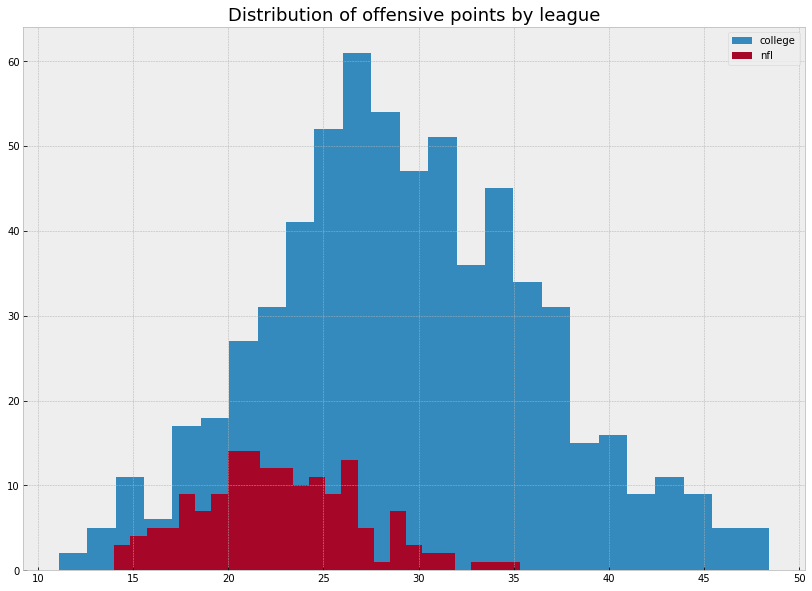

In [124]:
plt.figure(figsize=(14,10))
rec_df.groupby('league')['off_pts'].hist(bins=25);
plt.title("Distribution of offensive points by league", fontsize = 18);
plt.legend(['college', 'nfl']);

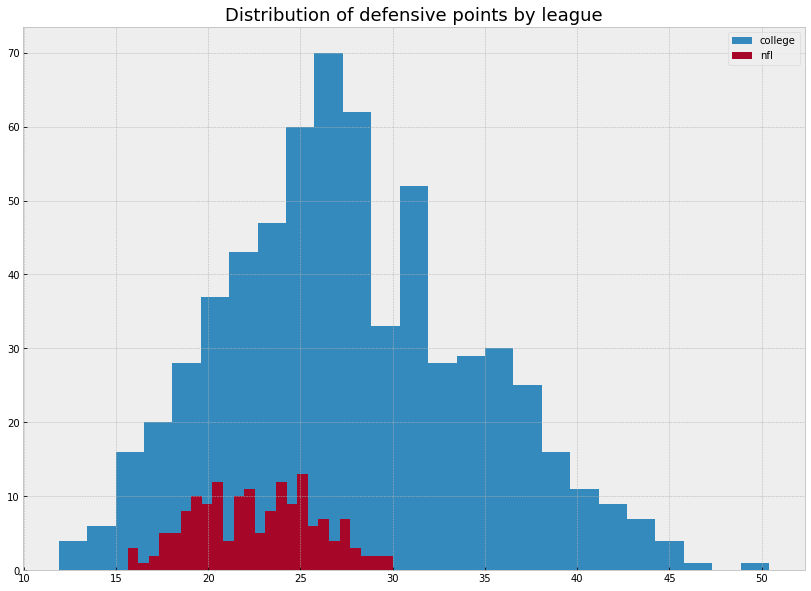

In [125]:
plt.figure(figsize=(14,10))
rec_df.groupby('league')['def_pts'].hist(bins=25);
plt.title("Distribution of defensive points by league", fontsize = 18);
plt.legend(['college', 'nfl']);

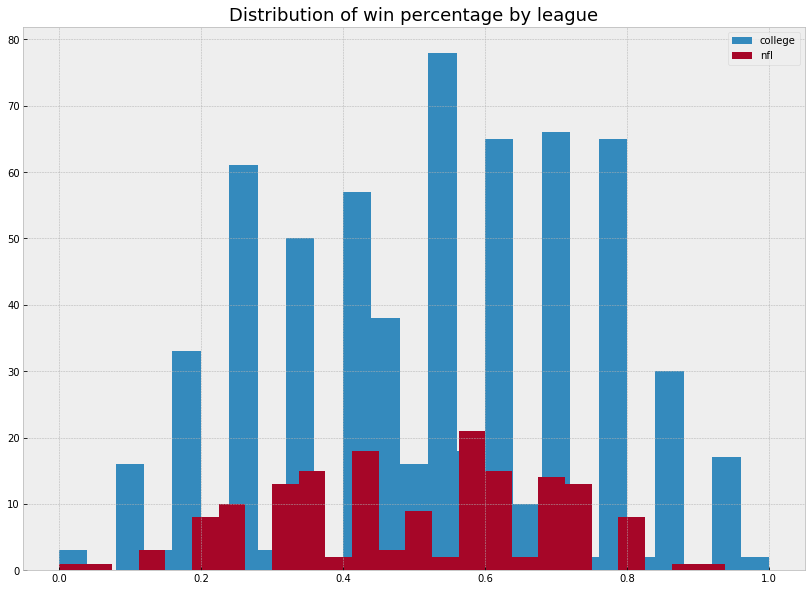

In [126]:
plt.figure(figsize=(14,10))
rec_df.groupby('league')['win_pct'].hist(bins=25);
plt.title("Distribution of win percentage by league", fontsize = 18);
plt.legend(['college', 'nfl']);

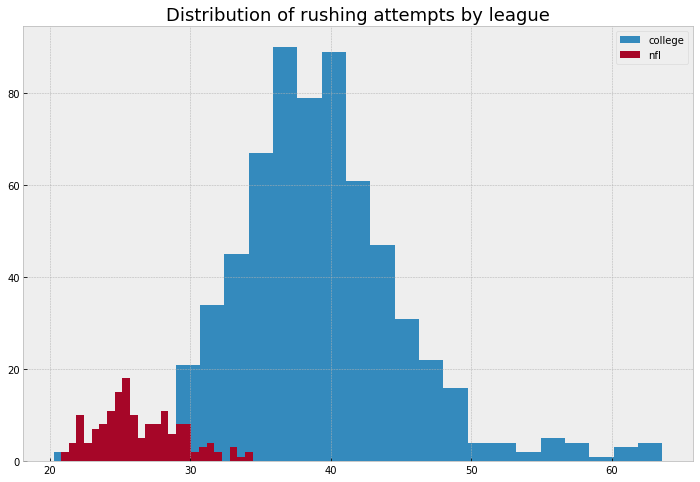

In [196]:
plt.figure(figsize=(12,8))
rec_df.groupby('league')['rush_att'].hist(bins=25);
plt.title("Distribution of rushing attempts by league", fontsize = 18);
plt.legend(['college', 'nfl']);

In [193]:
# plt.figure(figsize=(12,8))
# rec_df['rush_att'].hist(bins=25);
# plt.title("Distribution of rushing attempts", fontsize = 18);
# # plt.legend(['college', 'nfl']);

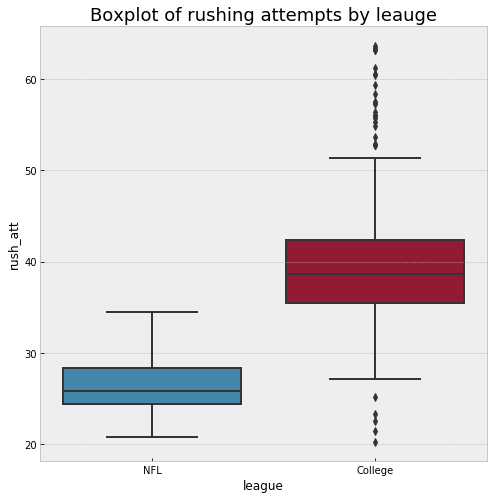

In [140]:
# Boxplot of Sentiment
plt.figure(figsize=(8,8))
sns.plotting_context(context=None, font_scale=1.5)
sns.boxplot(x=rec_df["league"], y=rec_df["rush_att"])
plt.title("Boxplot of rushing attempts by leauge", fontsize = 18);

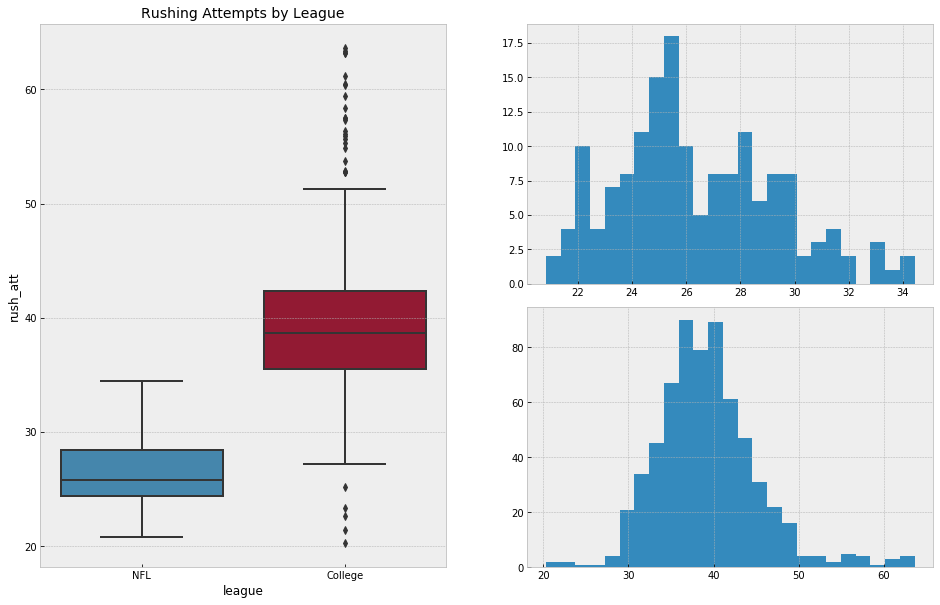

In [239]:
gridsize = (4, 2)


fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=4)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=2)

ax1.set_title('Rushing Attempts by League', fontsize=14)
# ax2.set_title('test2')
# ax3.set_title('test3')

sns.boxplot(x=rec_df["league"], y=rec_df["rush_att"], ax=ax1)
rec_df[rec_df['league'] == 'NFL']['rush_att'].hist(ax=ax2, bins=25)
rec_df[rec_df['league'] == 'College']['rush_att'].hist(ax=ax3, bins=25);

In [212]:
# ax1 = sns.boxplot(x=rec_df["league"], y=rec_df["rush_att"], ax=ax1)

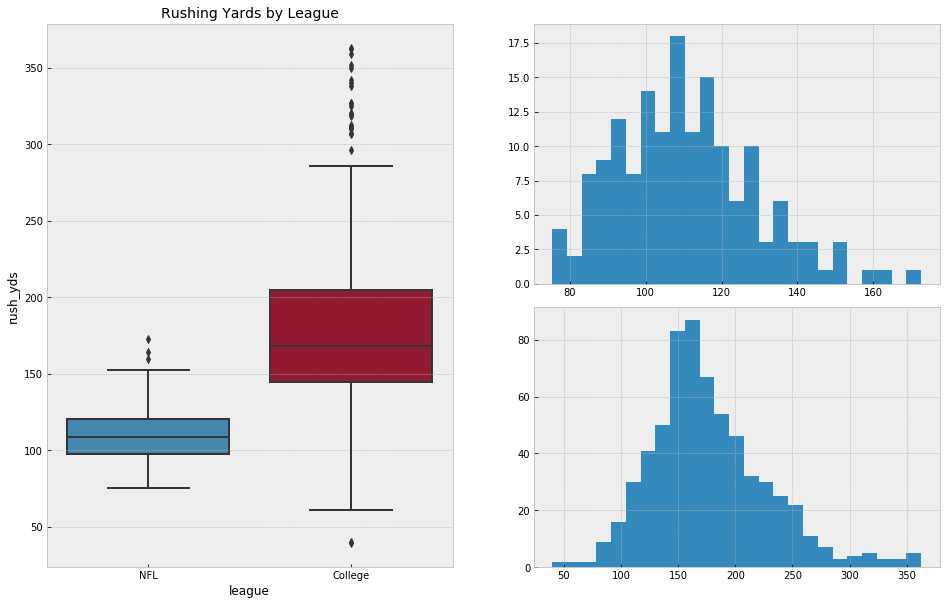

In [240]:
gridsize = (4, 2)


fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=4)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=2)

ax1.set_title('Rushing Yards by League', fontsize=14)
# ax2.set_title('test2')
# ax3.set_title('test3')

sns.boxplot(x=rec_df["league"], y=rec_df["rush_yds"], ax=ax1)
rec_df[rec_df['league'] == 'NFL']['rush_yds'].hist(ax=ax2, bins=25)
rec_df[rec_df['league'] == 'College']['rush_yds'].hist(ax=ax3, bins=25);

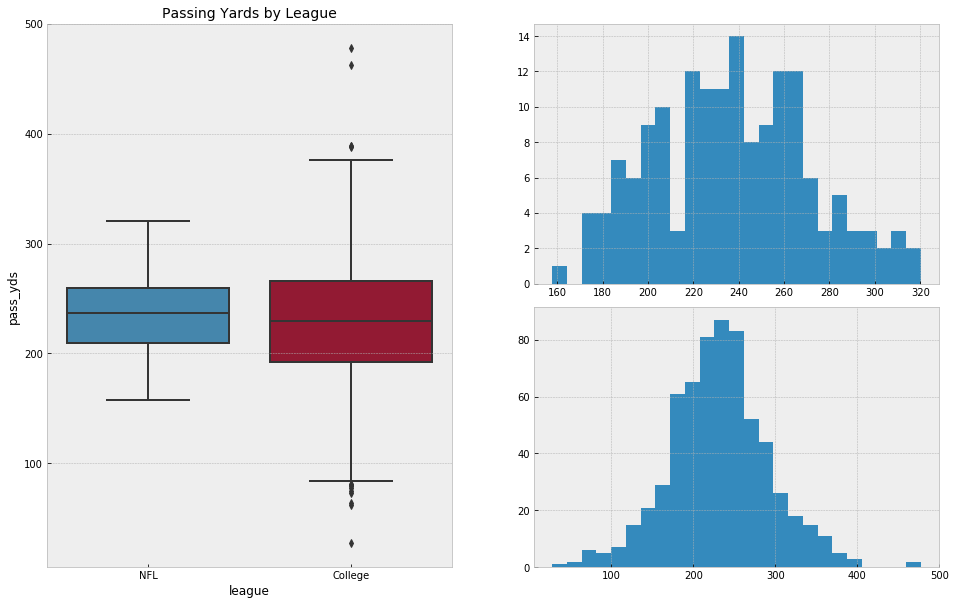

In [241]:
gridsize = (4, 2)


fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=4)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=2)

ax1.set_title('Passing Yards by League', fontsize=14)
# ax2.set_title('test2')
# ax3.set_title('test3')

sns.boxplot(x=rec_df["league"], y=rec_df["pass_yds"], ax=ax1)
rec_df[rec_df['league'] == 'NFL']['pass_yds'].hist(ax=ax2, bins=25)
rec_df[rec_df['league'] == 'College']['pass_yds'].hist(ax=ax3, bins=25);

### Review this section for necessity

This section has analysis of the initial DataFrames

In [83]:
# print(team_df.shape)

In [84]:
# team_df.columns

In [85]:
# print(pass_df.shape)

In [86]:
# pass_df.columns

In [87]:
# team_df

In [88]:
# pass_df.head(10)

In [89]:
# df['year'].value_counts().tail()

In [90]:
# df['team'].value_counts().tail()

In [91]:
# df['wins'].value_counts()

In [92]:
# plt.hist(df['wins'], bins=17);

In [93]:
# plt.hist(df['win_loss_perc'], bins=17);

### College EDA

In [94]:
# college_stand_df.head()

In [95]:
# college_stand_df.columns

In [96]:
# college_stand_df.isnull().mean().sort_values(ascending = False)

In [97]:
# college_off_df.head()

In [98]:
# college_off_df.columns

In [99]:
# college_off_df.isnull().mean().sort_values(ascending = False)

## DataFrame Completion Exports

In [100]:
# Exporting team DataFrame
# team_df.to_csv('../data/NFL_teams.csv', index=False)

In [101]:
# Exporting pass DataFrame
# pass_df.to_csv('../data/NFL_passing.csv', index=False)

Exporting concatenated dfs for later use.

In [102]:
rec_df.to_csv('../data/Combined_Final_Data/recommender_data.csv', index=False)

DataFrame to be used for the recommender system.